<img src=https://www.udc.es/export/sites/udc/silazarillo/_galeria_imgs/03_Simbolo_logo_cor.png_2063069294.png width="300" align="left">
<br />

# Aprendizaje automático II
#### <font color=green>*Máster en Informática Industrial y Robótica*</font>

# Tema 1: Reducción de la dimensionalidad con los datos Madelon

Madelon es un conjunto de datos artificial desarrollado por Isabelle Guyon como parte de una competición sobre técnicas de selección de características en el congreso NIPS 2003. Es un problema de clasificación muy no lineal de dos clases con variables de entrada continuas. El conjunto de datos contiene puntos de datos agrupados en 32 grupos colocados en los vértices de un hipercubo de cinco dimensiones y etiquetados aleatoriamente en dos clases. Las cinco dimensiones constituyen las 5 características informativas y, además, se añadieron 15 combinaciones lineales de esas características para formar un conjunto de 20 características informativas, aunque redundantes. Además, se añadieron una serie de variables de distracción que no tienen poder predictivo hasta llegar a un total de 500 variables. El orden de las variables y los datos se fijaron de forma aleatoria. No se proporciona información sobre atributos para evitar sesgos en el proceso de selección de características. Basándose en esas 500 características, se deben separar los ejemplos en 2 clases (correspondientes a las etiquetas 1 y 2)

Fuente de los datos:
https://www.openml.org/d/1485


#### Importación de las librerías:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

#### Lectura de los datos:

In [2]:
data = pd.read_csv("./Madelon.csv")
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V492,V493,V494,V495,V496,V497,V498,V499,V500,Class
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,2
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,2
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,2
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,493,458,503,478,517,479,472,478,444,477,...,475,485,443,517,486,474,489,506,506,1
2596,481,484,481,490,449,481,467,478,469,483,...,485,508,599,498,527,481,490,455,451,1
2597,485,485,530,480,444,487,462,475,509,494,...,474,502,368,453,482,478,481,484,517,1
2598,477,469,528,485,483,469,482,477,494,476,...,476,453,638,471,538,470,490,613,492,1


#### Se separan los datos de entrada y las salidas (etiquetas de cada dato):

In [5]:
X = data.drop('Class', axis=1)
t = data['Class']

# Se utiliza un diccionario por comprensión para contar las ocurrencias de las clases 1 y 2
num_datos_por_clase = {clase: sum(1 for c in t if c == clase) for clase in [1, 2]}

print("Número de variables   : {}".format(X.shape[1]))
print("Número total de datos : {}".format(num_datos_por_clase[1] + num_datos_por_clase[2]))
print("Datos de la clase 1   : {}".format(num_datos_por_clase[1]))
print("Datos de la clase 2   : {}".format(num_datos_por_clase[2]))

Número de variables   : 500
Número total de datos : 2600
Datos de la clase 1   : 1300
Datos de la clase 2   : 1300


#### Dividimos en conjunto de entrenamiento y test:

In [7]:
X_train, X_test, t_train, t_test = train_test_split(X, t, train_size=0.7)
print(f"El conjunto de entrenamiento contiene : {len(X_train)}")
print(f"El conjunto de test contiene : {len(X_test)}")

El conjunto de entrenamiento contiene : 1819
El conjunto de test contiene : 781


#### Entrenamos un modelo de Random Forest con 100 árboles usando las 500 variables:

In [8]:
model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0)
model.fit(X_train,t_train)
y_pred = model.predict(X_test)
report = classification_report(t_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.69      0.67      0.68       378
           2       0.70      0.72      0.71       403

    accuracy                           0.70       781
   macro avg       0.70      0.69      0.69       781
weighted avg       0.70      0.70      0.69       781



#### Calculamos, y mostramos como un [mapa de calor](https://seaborn.pydata.org/generated/seaborn.heatmap.html), la [matriz de correlación](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) con las 30 primeras variables y también la variable de salida:

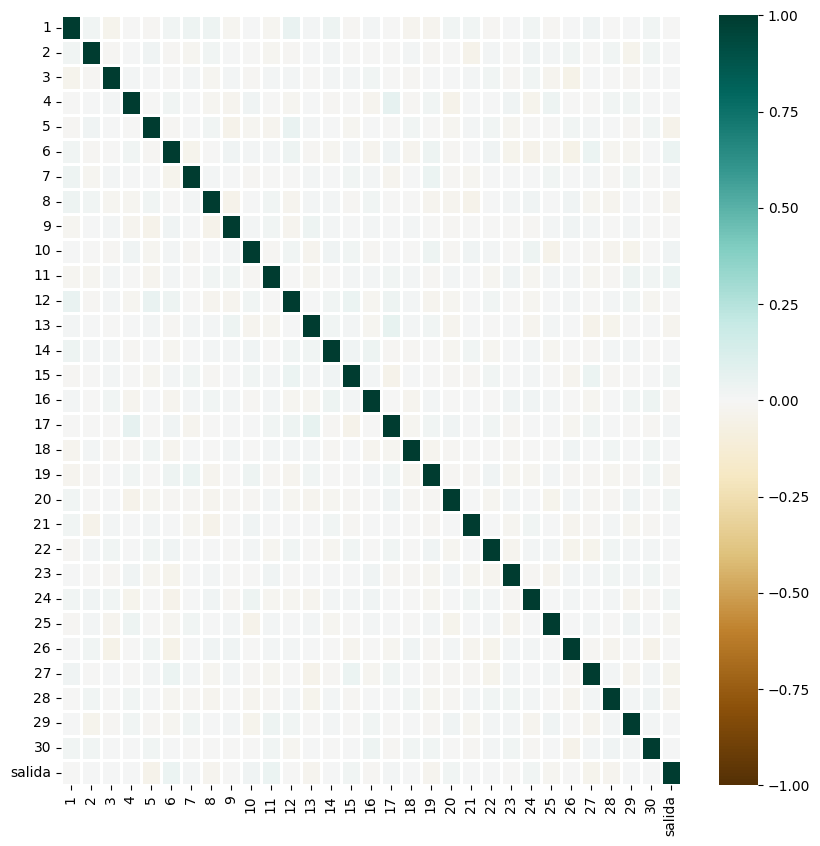

In [9]:
X_subset = X.iloc[:,:30]
plt.figure(figsize=(10, 10))

corr_mat = np.corrcoef(np.c_[X_subset, t].T)    # Se calcula la matriz de correlación
etiquetas = [str(i) for i in range(1, X_subset.shape[1] + 1)]   # Etiquetas para las variables
etiquetas.append('salida')

sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=False, linewidths=1, cmap='BrBG',  # Creación del mapa de calor 
            xticklabels=etiquetas, yticklabels=etiquetas, cbar=True);

#### Aplicamos la técnica de [Análisis de Componentes Principales (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) para determinar los componentes principales para reducir la dimensión de entrada. Visualizamos las 30 componentes principales como un gráfico de barras para observar los más relevantes:

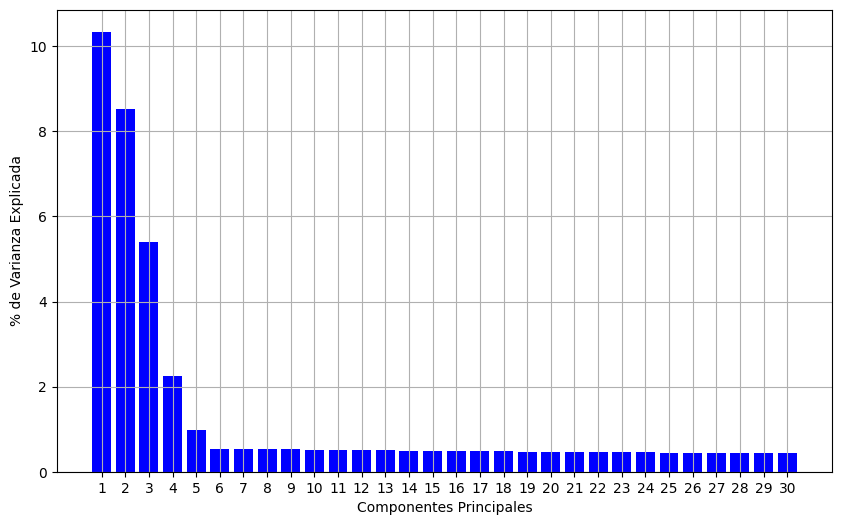

In [10]:
pca = PCA(n_components=30)
data_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_ * 100  # % de varianza explicada por cada componente principal
n_components = np.arange(1, X_subset.shape[1]+1)                # Número de componentes principales

plt.figure(figsize=(10, 6))                                     # Crear el gráfico de barras
plt.bar(n_components, explained_variance_ratio, color='b')
plt.xlabel('Componentes Principales')
plt.ylabel('% de Varianza Explicada')
plt.xticks(np.arange(1, X_subset.shape[1]+1, 1))
plt.grid(True)
plt.show()

#### Calculamos, y mostramos como un [mapa de calor](https://seaborn.pydata.org/generated/seaborn.heatmap.html), la [matriz de correlación](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) con los 30 primeros componentes principales. Como se puede observar las variables no presentan correlación entre ellas:

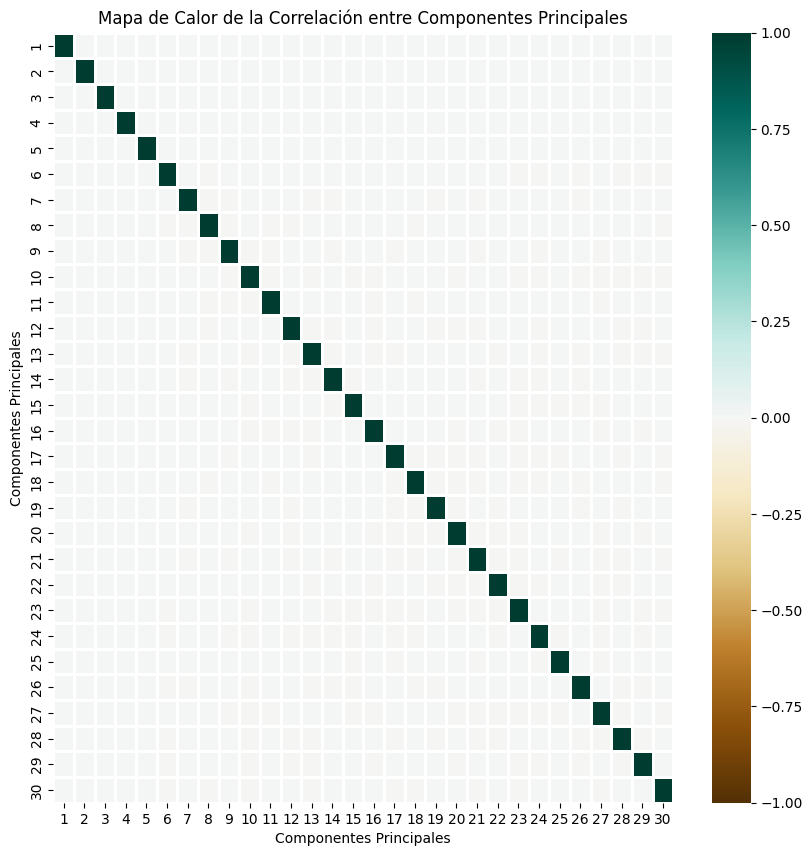

In [11]:
corr_mat_pca = np.corrcoef(data_pca.T)

plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat_pca, vmin=-1, vmax=1, annot=False, linewidths=1, cmap='BrBG', 
            xticklabels=n_components, yticklabels=n_components, cbar=True)
plt.xlabel('Componentes Principales')
plt.ylabel('Componentes Principales')
plt.title('Mapa de Calor de la Correlación entre Componentes Principales')
plt.show()

#### Entrenamos un modelo de Random Forest usando las componentes principales más relevantes determinadas con la PCA. Usarmos un [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) de scikit-learn para integrar 3 fases secuenciales:
##### 1) Normalización con media 0 y desviación típica 1
##### 2) Reducción de la dimensionalidad con PCA
##### 3) Modelo de aprendizaje con Random Forest

¿Qué resultados se obtiene si se quita la normalización del pipeline?


### R/ En los experimentos que se realizaron el pipeline sin normalización brindaba mejores resultados.

In [13]:
train_data_pca, test_data_pca, t_train_data_pca, t_test_data_pca = train_test_split(data_pca, t, train_size=0.7)

# Se crea una función para evaluar el pipeline
def evaluate_pipeline(pipeline, train_data, t_train_data, test_data, t_test_data):
    pipeline_cloned = clone(pipeline)               # Clonar el pipeline para asegurarse de que se crea un nuevo modelo en cada llamada
    pipeline_cloned.fit(train_data, t_train_data)   # Entrenar el modelo con los datos de entrenamiento   
    y_pred_data = pipeline_cloned.predict(test_data) # Realizar predicciones con el modelo entrenado
    report = classification_report(t_test_data, y_pred_data)
    return report

# Se definen los pipelines 
pipelines = {
    'con_normalizacion': make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=10, max_depth=30, random_state=0)),
    'sin_normalizacion': RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0)
}

for name, pipeline in pipelines.items():
    print("\nMétodo PCA")
    print(f"Informe para el pipeline '{name}':\n")
    report_pca = evaluate_pipeline(pipeline, train_data_pca, t_train_data_pca, test_data_pca, t_test_data_pca)
    print(report_pca)


Método PCA
Informe para el pipeline 'con_normalizacion':

              precision    recall  f1-score   support

           1       0.59      0.82      0.69       366
           2       0.76      0.51      0.61       415

    accuracy                           0.65       781
   macro avg       0.68      0.66      0.65       781
weighted avg       0.68      0.65      0.65       781


Método PCA
Informe para el pipeline 'sin_normalizacion':

              precision    recall  f1-score   support

           1       0.73      0.84      0.79       366
           2       0.84      0.73      0.78       415

    accuracy                           0.78       781
   macro avg       0.79      0.79      0.78       781
weighted avg       0.79      0.78      0.78       781



#### Entrenamos un modelo de Random Forest usando ahora el método de [Análisis de Componentes Independientes (ICA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html) Usarmos un [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) de scikit-learn para integrar 3 fases secuenciales:
##### 1) Normalización con media 0 y desviación típica 1
##### 2) Reducción de la dimensionalidad con ICA
##### 3) Modelo de aprendizaje con Random Forest

In [14]:
ica = FastICA(n_components=30, random_state=0)
data_ica = ica.fit_transform(X)
train_data_ica, test_data_ica, t_train_data_ica, t_test_data_ica = train_test_split(data_ica, t, train_size=0.7)

c:\Users\00800837\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [15]:
for name, pipeline in pipelines.items():
    print("\nMétodo ICA")
    print(f"Informe para el pipeline '{name}':\n")
    report_ica = evaluate_pipeline(pipeline, train_data_ica, t_train_data_ica, test_data_ica, t_test_data_ica)
    print(report_ica)


Método ICA
Informe para el pipeline 'con_normalizacion':

              precision    recall  f1-score   support

           1       0.62      0.73      0.67       395
           2       0.67      0.55      0.60       386

    accuracy                           0.64       781
   macro avg       0.65      0.64      0.64       781
weighted avg       0.64      0.64      0.64       781


Método ICA
Informe para el pipeline 'sin_normalizacion':

              precision    recall  f1-score   support

           1       0.69      0.72      0.70       395
           2       0.70      0.67      0.68       386

    accuracy                           0.69       781
   macro avg       0.69      0.69      0.69       781
weighted avg       0.69      0.69      0.69       781

